### Igor de Jesus Santos - 119017594
### Matheus Isidoro - 119059596
### Saulo Roberto - 120128489

### Nosso grupo fez um algoritmo que recebe por meio de uma interface gráfica o caminho de uma rquivo .csv, a quantidade de clusters e os nomes das colunas da tabela que será usada para plotar o gráfico com a clusterização (lembrando que há a possibilidade de usar 1, 2 ou 3 dimensões, sendo definido pelo número de colunas passadas). Ao passar uma string vazia para a próxima coluna o gráfico é plotado.

### Intrução de uso: Executar o arquivo pyqt5.py
### Necessário bibliotecas numpy, matplotlib, pandas e pyqt5

In [2]:
import numpy as np
import matplotlib.pyplot as plt

K-means é um algoritmo de clusterização(agrupamento). É um algoritmo não supervisionado, ou seja, não precisa de supervisão humana para realizar os agrupamentos. Com base nos própios dados o algoritmo automaticamente classificará os dados mais semelhantes entre si a partir da menor distância à um centroide, que é um ponto inicialmente aleatório, mas que varia durante o algoritmo. Os únicos parâmetros necessários para o algoritmo é a quantidade de centroídes que queremos ter e os dados nos quais queremos aplicar o algoritmo.

O algoritmo se divide em 5 passos:

Passo 1: Definir aleatoriamente a posição dos centroides dentro do conjunto de dados.

Passo 2: Calcular para cada ponto o centroide de menor de distãncia

Passo 3: Associar cada ponto a um cluster(agrupamento) que será o cluster do centroide de menor distância

Passo 4: Reposicionar os centroides com base na media dos pontos associados a eles.

Passo 5: Repetir iterativamente os passos 2, 3 e 4 até obtermos a melhor posição dos centroides. Isso acontecerá quando os centroides não mais variarem de posição no passo 4.

In [4]:
def calcula_dist(p1, p2):
    """
    :param p1: primeiro ponto
    :param p2: segundo ponto
    :return: distância entre o primeiro e segundo ponto
    """
    if type(p1) == np.int64:
        return abs(p1 - p2)
    elif p1.shape[0] == 2:
        return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** (1 / 2)
    else:
        return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2 + (p1[2] - p2[2]) ** 2) ** (1 / 2)

In [5]:
def k_means(n_clusters, data):
    """
    :param n_clusters: número de clusters
    :param data: dados
    :return: dicionário onde a chave é o centróide e o valor associado os pontos próximos a ele
    """

    # Determinando a dimensão do array
    if len(data.shape) == 1:
        dimensao = 1
    elif data.shape[1] <= 3:
        dimensao = data.shape[1]
    else:
        return None

    # Obtendo centroides aleatórios
    cluster_centers = set()
    while len(cluster_centers) != n_clusters:
        if dimensao == 1:
            cluster_centers = set([data[np.random.randint(0, data.shape[0])] for _ in range(n_clusters)])
        else:
            cluster_centers = set([tuple(data[np.random.randint(0, data.shape[0])]) for _ in range(n_clusters)])
    cluster_centers = tuple(cluster_centers)

    # Listas para saber se as médias dos pontos mudaram a cada iteração
    centers_before = None
    centers_after = []
    centers = None

    while centers_before != centers_after:
        centers_before = centers_after

        # Dicionário de pontos por centroides
        centers = dict(zip(cluster_centers, [set() for _ in range(n_clusters)]))

        # Associa cada ponto ao seu centroide mais próximo
        for ponto in data:
            min_center = None
            min_dist = np.inf
            for center in cluster_centers:
                dist = calcula_dist(ponto, center)
                if dist < min_dist:
                    min_center = center
                    min_dist = dist
            if dimensao == 1:
                centers[min_center].add(ponto)
            else:
                centers[min_center].add(tuple(ponto))

        # Cálculo os novos centroides
        centers_after = []
        for center in centers:
            ponto_medio = []
            for i in range(dimensao):
                if dimensao == 1:
                    soma = sum(centers[center])
                else:
                    soma = sum([center[i] for center in centers[center]])
                media = round(soma / len(centers[center]), 5)
                ponto_medio.append(media)
            centers_after.append(tuple(ponto_medio))

        cluster_centers = tuple(centers_after)
    return centers

In [6]:
def plotar(data, result):
    if type(list(list(result.values())[0])[0]) == np.int64:
        plt.hlines(1, 1, max(data) + 1)
        plt.xlim(0, max(data) + 1)
        plt.ylim(0.5, 1.5)

        for item in result:
            lista = list(result[item])
            y = np.ones(np.shape(lista))
            plt.plot(lista, y, '|', ms=40)
        plt.axis('off')
        plt.show()
    else:
        plt.figure(figsize=(12, 12))
        if data.shape[1] == 3:
            ax = plt.axes(projection='3d')
        for item in result:
            array = np.array(list(result[item]))
            if array.shape[1] == 2:
                plt.scatter(array[:, 0], array[:, 1])
            else:
                plt.scatter(array[:, 0], array[:, 1], array[:, 2])
        centroides = np.array(list(result.keys()))
        if centroides.shape[1] == 2:
            plt.scatter(centroides[:, 0], centroides[:, 1], marker="*", c="red")
        else:
            plt.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 2],marker="*", c="red")
        plt.show()

## Visualizando com uma dimensão

In [6]:
array_1d = np.array([1, 2, 3, 4, 10, 15, 20, 100, 155, 200])
array_1d

array([  1,   2,   3,   4,  10,  15,  20, 100, 155, 200])

In [7]:
result = k_means(2, array_1d)
result

{(7.85714,): {1, 2, 3, 4, 10, 15, 20}, (151.66667,): {100, 155, 200}}

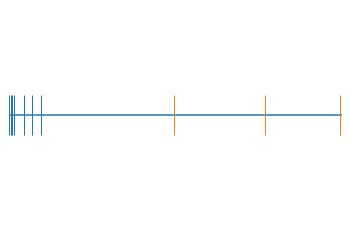

In [8]:
plotar(array_1d, result)

## Visualizando com duas dimensões

In [22]:
array_2d = np.array([[1, 2], [7, 11], [100, 1], [200, 4], [0, 0], [27, 33]])
array_2d

array([[  1,   2],
       [  7,  11],
       [100,   1],
       [200,   4],
       [  0,   0],
       [ 27,  33]])

In [23]:
result = k_means(2, array_2d)
result

{(8.75, 11.5): {(0, 0), (1, 2), (7, 11), (27, 33)},
 (150.0, 2.5): {(100, 1), (200, 4)}}

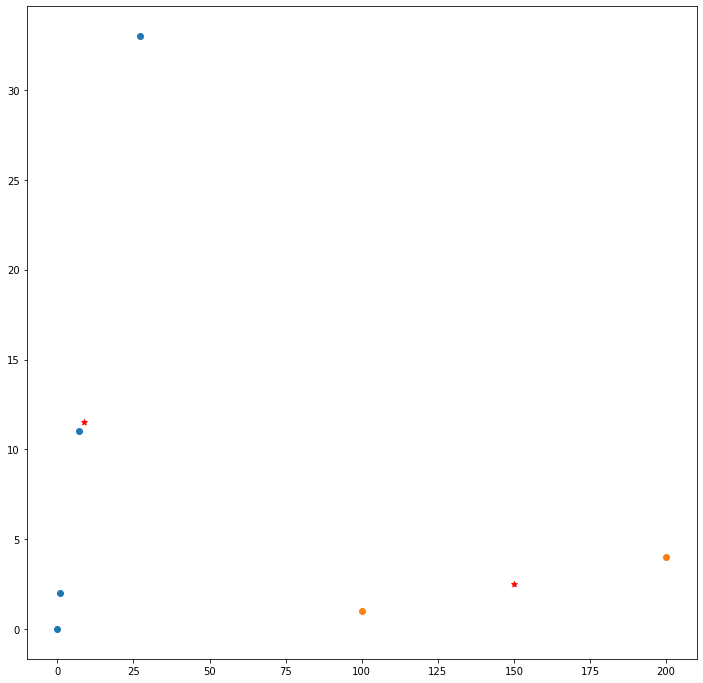

In [24]:
plotar(array_2d, result)

## Visualizando com três dimensões

In [16]:
array_3d = np.array([[1, 2, 100], [7, 11, 94], [100, 1, 16], [200, 4, 10], [3, 3, 3], [27, 33, 2], [7, 15, 100]])
array_3d

array([[  1,   2, 100],
       [  7,  11,  94],
       [100,   1,  16],
       [200,   4,  10],
       [  3,   3,   3],
       [ 27,  33,   2],
       [  7,  15, 100]])

In [17]:
result = k_means(2, array_3d)
result

{(9.0, 12.8, 59.8): {(1, 2, 100),
  (3, 3, 3),
  (7, 11, 94),
  (7, 15, 100),
  (27, 33, 2)},
 (150.0, 2.5, 13.0): {(100, 1, 16), (200, 4, 10)}}

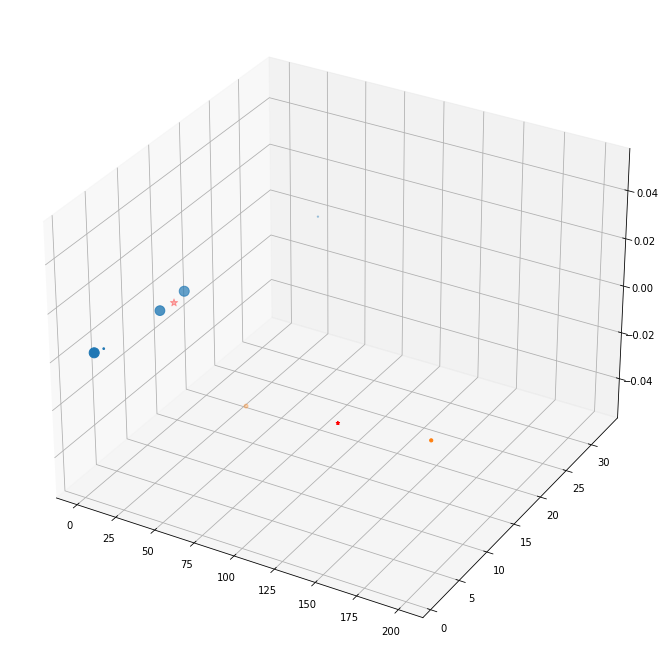

In [18]:
plotar(array_3d, result)